<a href="https://colab.research.google.com/github/MorganGautherot/Tuto_Tree_ML/blob/master/Arbres_de_d%C3%A9cision_classifieur_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbres de décision classifieur avec sklearn



Dans ce notebook, je vais vous présenter la fonction d'arbre de décision de sklearn. Vous allez voir à quoi servent tous les paramètres ainsi que les attributs pour être sûr de choisir les bonnes options, afin de créer les modèles d'arbres les plus performants. 

In [0]:
# Importation des packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importation des données
from sklearn.datasets import load_iris

# Load data
iris = load_iris()

X = iris.data[:, ]
y = iris.target


## Les paramètres



Dans cette partie, je vais prendre le temps de vous expliquer chaque paramètre de l'algorithme d'arbre de décision. De cette façon, vous pourrez choisir judicieusement les paramètres les plus adaptés à votre problème dans le but d'entraîner le modèle d'arbre le plus performant. 

In [0]:
# Initialisation des paramètres du modèle
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Si vous ne choisissez pas de paramètres, vous aurez les paramètres par défaut choisi par Sklearn. Ces paramètres ne seront pas toujours adaptés à votre jeu de données.

Pour choisir vos paramètres, il vous suffit d'ajouter dans la parenthèse le nom du paramètre et d'ajouter '=' et l'option choisit. Comme vous pouvez voir sur l'exemple ci-dessous.

In [0]:
# Initialisation des paramètres du modèle
DecisionTreeClassifier(criterion='gini', min_samples_split="10", max_depth='5')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth='5', max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split='10',
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Criterion



Le paramètre *criterion* est la fonction de coût, c'est-à-dire le critère de performance que l'on choisit pour construire notre modèle et mesurer sa qualité. 

On a le choix entre deux options : le calcule de l'entropie ou l'indice gini. 

Je ne vais pas détailler ces indices ici, si vous voulez avoir plus d'informations cliqué sur les liens ci-dessous :
 - [gini](https://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision_(apprentissage)#Cas_des_arbres_de_classification)
 - [entropie](https://fr.wikipedia.org/wiki/Entropie_de_Shannon)

### splitter



Le paramètre splitter nous permet de choisir comment nous allons séparer notre jeu de données pour construire notre arbre. 

Nous pouvons choisir aléatoirement la variable sur laquelle séparer notre jeu de donnée ou nous pouvoir itérer afin de choisir la meilleure variable pour séparer notre jeu de données. 

Je vous conseil de choisir *best* qui choisis la variable la plus importante à séparer de cette façon vous obtiendrez un arbre moins profond et plus performant. 



In [0]:
# Initialisation des paramètres du modèle
DecisionTreeClassifier(splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Vous pouvez utiliser *random* lorsque vous savez que toutes vos variables sont importantes pour votre modèle et que vous voulez économiser du temps de calcul. Dans tous les autres cas utilisés *best*.

In [0]:
# Initialisation des paramètres du modèle
DecisionTreeClassifier(splitter='random')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

### max_depth



La profondeur de l'arbre est un des paramètres les plus important à définir. 

Ce paramètre va déterminer la longueur maximum de votre arbre. Vous pouvez aussi spécifier None pour ce paramètre, dans ce cas durant l'entraînement l'arbre va s'approfondir jusqu'à obtenir les feuilles les plus pures possible. 

Je ne vous conseille pas de laisser ce paramètre à *None*, car plus votre arbre sera profond plus il sera complexe et plus il souffrira du sur-entraînement. 

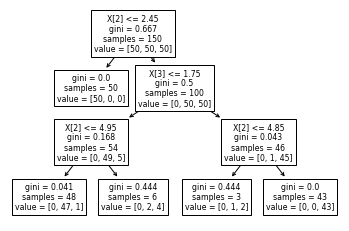

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=3)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

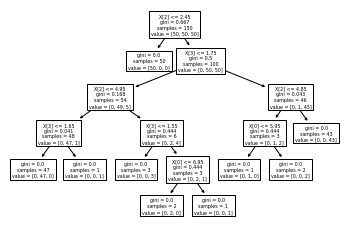

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=None)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

Plus l'arbre est profond, plus il sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus la profondeur est réduite, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous augmentez trop la profondeur de l'arbre, vous dégraderez aussi les performances global du modèle. Tester plusieurs profondeurs afin de maximiser vos performances sur votre jeu de tests.

### min_samples_split



Le min sample split est le nombre minimal d'exemples que le modèle doit avoir pour pouvoir faire une nouvelle séparation. 

Vous avez le choix de remplir ce paramètre avec un entier (int) ou un flottant (float). 

Si vous utilisez un entier, le modèle le comprendra comme le nombre minimal d'exemples que le noeud doit avoir pour pouvoir créer une nouvelle séparation. 

Si vous utiliser un flottant, le modèle le comprendra comme la fraction de données que le noeud doit avoir pour pouvoir créer une nouvelle séparation.

Plus ce paramètre sera grand plus votre arbre sera simple et plus il sera généralisable.

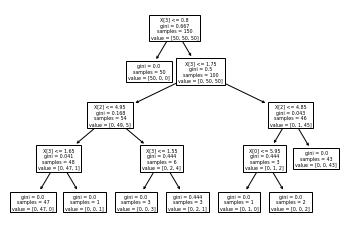

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

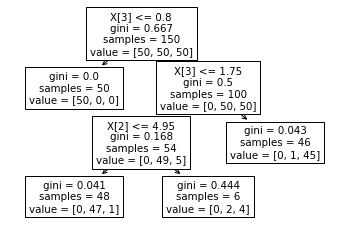

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=50)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

Plus ce paramètre est petit, plus le modèle sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus ce paramètre est élevé, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous augmentez trop ce paramètre, vous dégraderez aussi les performances global du modèle. Tester plusieurs valeurs afin de maximiser vos performances sur votre jeu de tests.

### min_samples_leaf



Le min_sample_leaf est le minimum d'exemples requis pour créer une feuille.

Seules les feuilles ayant ce minimum d'exemples seront conservées. Pour ce paramètre aussi vous pouvez spécifier un nombre entier ou un nombre flottant.

Plus ce paramètre sera bas, plus votre modèle pourra faire du cas par cas et aura du mal à généraliser.

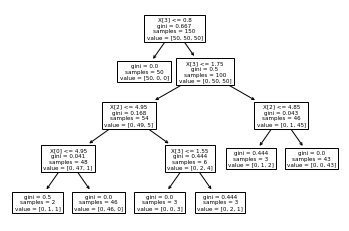

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

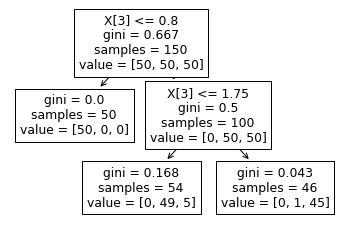

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

Plus ce paramètre est petit, plus le modèle sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus ce paramètre est élevé, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous augmentez trop ce paramètre, vous dégraderez aussi les performances global du modèle. Tester plusieurs valeurs afin de maximiser vos performances sur votre jeu de tests.

### min_weight_fraction_leaf



Dans l'entraînement d'un modèle d'arbre de décision, on peut ajouter un vecteur de poids qui donne une importance différente aux observations de notre jeu de données.

Si vous avez donné un vecteur de poids avec votre jeu de données, ce paramètre vous permet de spécifier le minimum de poids de votre feuille pour sa création. Si vous n'avez pas ajouté de vecteur de poids pour l'entraînement de votre modèle, ce paramètre a la même utilité que le paramètre min_sample_leaf.

Pour ce paramètre aussi vous pouvez spécifier un nombre entier ou un nombre flottant.

### max_features



Le paramètre max_features contrôle le nombre de variables à tester pour trouver la meilleure séparation.

Vous pouvez indiquer un entier qui déterminera le nombre de variables à tester.

Vous pouvez indiquer un flottant qui sera la proportion de variables à tester parmi les variables du jeu de données.

Il y a une option auto qui effectue un test pour chaque variable de votre jeu de données, cette option est équivalente à choisir None. 

Il y a une option sqrt qui teste la racine carré du nombre de variables du jeu de données.

Il y a une option log2 qui teste le log2 du nombre de variables de votre jeu de données.

À noter que même si vous spécifiez un maximum de variable à tester l'algorithme peut le dépasser dans le cas où il ne trouve pas de variable valide pour séparer le jeu de données dans le nombre de tests imparti. 


C'est un paramètre à tuner si vous avez des problèmes de performance et que vous voulez réduire le temps de calcul. Si vous n'avez pas de problème de performance, je vous recommande de laisser None ou auto.

### random_state


Ce paramètre permet d'initialiser une seed. C'est-à-dire que les nombres générés aléatoirement seront toujours les mêmes. C'est intéressant à utiliser durant les tests où l'on voudra tomber sur les mêmes résultats et être sûr que les changements de performance sont dû au changement des paramètres et non à une initialisation différente.

### max_leaf_nodes



Ce paramètre vous permet de choisir le nombre maximum de feuilles de votre arbre, il peut être intéressant de fixer ce nombre pour contrôler la complexité de l'arbre. Il garde bien sûr les meilleures feuilles disponibles.

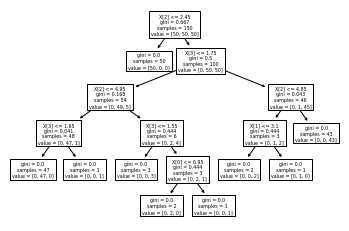

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=14)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

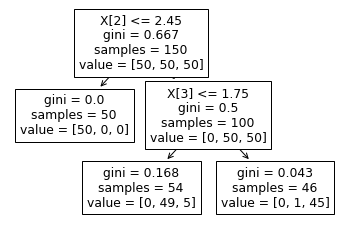

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

Plus ce paramètre est grand, plus le modèle sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus ce paramètre sera petit, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous réduisez trop ce paramètre, vous dégraderez aussi les performances global du modèle. Tester plusieurs valeurs afin de maximiser vos performances sur votre jeu de tests.

### min_impurity_decrease



Ce paramètre permet de contrôler si le gain de pureté est suffisant pour continuer la construction de l'arbre dans cette voie. 

Ce paramètre peut être intéressant, car il est possible d'avoir des règles supplémentaires qui complexifie le modèle pour ne faire gagner que peu de pureté.

Plus la valeur de ce paramètre est bas plus l'arbre sera complexe et moins il sera généralisable.

Plus la valeur de ce paramètre est élevée plus l'arbre sera simple et généralisable. 

### min_impurity_split



Ce paramètre n'est plus maintenu ne l'utilisait pas préférez utiliser min_impurity_decrease.

### class_weight



Ce paramètre permet de donner un poids différent aux classes de notre jeu d'entraînement. Ce paramètre peut être intéressant lorsque nous avons à faire à un jeu de données qui n'est pas réparti équitablement entre les différentes classes.

### presort 



N'utilisez pas ce paramètre, il n'est plus maintenu et il sera supprimé dans la version 0.24.

### ccp_alpha



Ce paramètre initialise le *alpha* de l'algorithme du minimal Cost-Complexity Pruning (CCP).

Le CCP est un algorithme qui permet de supprimer des parties de l'arbre qui ajoute de la complexité au modèle sans apporter beaucoup de valeur supplémentaire. Le but de cette suppression est de rendre l'algorithme plus simple et plus généralisable tout en conservant une performance acceptable.

Le paramètre alpha est un nombre positif. Plus le paramètre est élevé plus le modèle sera simplifié. 

Attention si *alpha* est trop élevé votre modèle deviendra trop simple et cela dégradera la performance de votre modèle. 

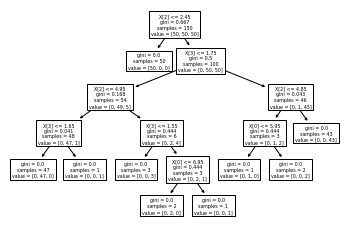

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=30, ccp_alpha=0)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

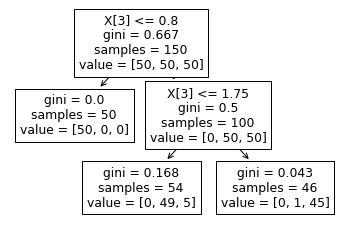

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=30, ccp_alpha=0.1)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

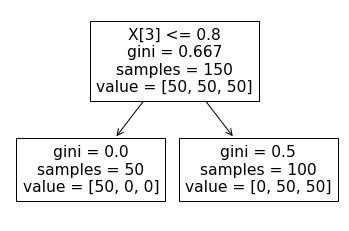

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=30, ccp_alpha=0.3)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

## Les attributs



Les attributs sont les différentes informations que l'on peut obtenir du modèle une fois qu'il est entraîné.

### classes_



L'attribut classe nous retourne les différentes classes du modèle.

In [0]:
model_tree.classes_

array([0, 1, 2])

### feature_importances_


L'attribut feature_importances permet de retourner l'importance des variables dans votre modèle. L'importance de chaque variable peut être facilement évaluée lorsque votre modèle est simple. Mais plus votre modèle sera complexe, plus cet attribut vous sera utile. 

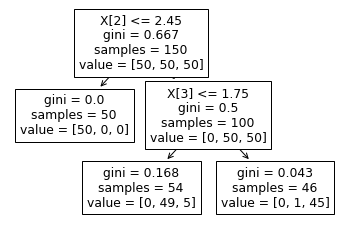

array([0.        , 0.        , 0.56199095, 0.43800905])

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=3)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

model_tree.feature_importances_

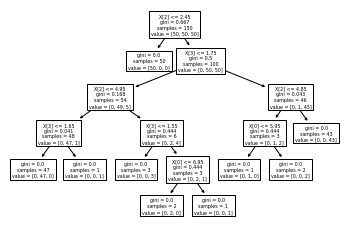

array([0.02666667, 0.        , 0.55072262, 0.42261071])

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=None)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

model_tree.feature_importances_


### max_features_


L'attribut max_features permet de vous retourner la valeur du paramètre max_features lors de l'entraînement du modèle.

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=4, max_features=None)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

print(X.shape)
print(model_tree.max_features_)

(150, 4)
4


In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=4, max_features=2)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

print(X.shape)
print(model_tree.max_features_)

(150, 4)
2



### n_classes_



Cet attribut permet de connaître le nombre de classes lors de l'entraînement du modèle.

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier()

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

model_tree.n_classes_

3

### n_features_



L'attribut n_features_ permet de connaître le nombre de variables utilisé pour entraîner le modèle. 

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier()

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

print(X.shape)
print(model_tree.n_features_)

(150, 4)
4


### n_outputs_



L'attribut n_outputs retourne le nombre de sorties du modèle. 

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier()

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

print(model_tree.n_outputs_)

1


### tree_

L'attribut tree_ retourne l'objet de l'arbre créé pendant l'entraînement. Vous pouvez vous en servir pour étudier l'arbre plus en profondeur et en retirer les règles de décisions.

In [0]:
# Initialisation des paramètres du modèle
model_tree = DecisionTreeClassifier(max_leaf_nodes=4)

# Entraînement du modèle d'arbre
model_tree.fit(X, y)

model_tree.tree_